In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the datetime module from the datetime library to convert the UTC date to a date format with YYYY-MM-DD-HH-MM-SS
from datetime import datetime

In [5]:
# Import the time module to get today's date
import time

In [6]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [7]:
# Create a set of random latitude and longitude combinations

# declare each array as a variable
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
# pack the lats and lngs as pairs by zipping them
# there will be 1500 tuples of paired lats and lngs
lat_lngs = zip(lats, lngs)
# the output is a zip object in memory
# each lat and long in a tuple can be accessed by the index of 0 and 1
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [9]:
# Iterate through our zipped lat_lngs tuple and find the nearest city

# 1. Create a list for holding the city names
cities = []

# 2. Identify the nearest city for each lat lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # 3. If the city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)

# 4. Print the city count to confirm sufficient count
len(cities)

579

In [10]:
# Create a base URL for the API call & set to a variable 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our "cities" list
# use the enumerate() method as an alt. way to iterate through list & recieve both index and city
for i, city in enumerate(cities):
    
    # Group the cities in sets of 50 for logging purposes
    # Check if the remainder of the index divided by 50 == 0
    # Check if the index is greater than or equal to 50
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city
    # remove the blank spaces in the city name and concatenate the city name
    city_url = url + "&q=" + city.replace(" ", "+")
    # Log the URL, record count, set count and the city being processed
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count before the next city is processed
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city_data list with a dictionary for that city
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        # pass is a general purpose statement to handle all errors encountered
        # will allow the program to continue
        pass
    
# Indicate the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ayorou
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | grand gaube
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | mugur-aksy
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | san andres
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | goma
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | hambantota
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | benghazi
Processing Record 21 of Set 1 | puerto ayacucho
Processing Record 22 of Set 1 | port e

Processing Record 34 of Set 4 | schwabach
Processing Record 35 of Set 4 | touros
Processing Record 36 of Set 4 | chik
Processing Record 37 of Set 4 | tamboesti
City not found. Skipping...
Processing Record 38 of Set 4 | tsaratanana
Processing Record 39 of Set 4 | naryan-mar
Processing Record 40 of Set 4 | hornepayne
Processing Record 41 of Set 4 | luau
Processing Record 42 of Set 4 | dubenskiy
City not found. Skipping...
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | plettenberg bay
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | kiruna
Processing Record 48 of Set 4 | sorland
Processing Record 49 of Set 4 | dover
Processing Record 50 of Set 4 | constantine
Processing Record 1 of Set 5 | uyuni
Processing Record 2 of Set 5 | xai-xai
Processing Record 3 of Set 5 | lebork
Processing Record 4 of Set 5 | outjo
Processing Record 5 of Set 5 | callaway
Processing Record 6 of Set 5 | kobojango
City not f

Processing Record 26 of Set 8 | dalmatovo
Processing Record 27 of Set 8 | barra do garcas
Processing Record 28 of Set 8 | morondava
Processing Record 29 of Set 8 | hobyo
Processing Record 30 of Set 8 | vallenar
Processing Record 31 of Set 8 | lethem
Processing Record 32 of Set 8 | barreirinhas
Processing Record 33 of Set 8 | pryozerne
Processing Record 34 of Set 8 | zaysan
Processing Record 35 of Set 8 | borba
Processing Record 36 of Set 8 | raudeberg
Processing Record 37 of Set 8 | cotonou
Processing Record 38 of Set 8 | tonekabon
Processing Record 39 of Set 8 | abeche
Processing Record 40 of Set 8 | aflu
City not found. Skipping...
Processing Record 41 of Set 8 | korem
Processing Record 42 of Set 8 | kristiansund
Processing Record 43 of Set 8 | aksarka
Processing Record 44 of Set 8 | luena
Processing Record 45 of Set 8 | trinidad
Processing Record 46 of Set 8 | parabel
Processing Record 47 of Set 8 | amos
Processing Record 48 of Set 8 | cabo rojo
Processing Record 49 of Set 8 | melni

Processing Record 17 of Set 12 | nao-me-toque
City not found. Skipping...
Processing Record 18 of Set 12 | pedernales
Processing Record 19 of Set 12 | grand-lahou
Processing Record 20 of Set 12 | cambara
Processing Record 21 of Set 12 | kiri buru
Processing Record 22 of Set 12 | port shepstone
Processing Record 23 of Set 12 | wehr
Processing Record 24 of Set 12 | noyabrsk
Processing Record 25 of Set 12 | itaquyry
Processing Record 26 of Set 12 | tinglev
Processing Record 27 of Set 12 | usinsk
Processing Record 28 of Set 12 | moose factory
Processing Record 29 of Set 12 | puerto del rosario
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Tally the number of cities in the city_data array of dictionaries 
# check to make sure you got more than 500 cities
len(city_data)

531

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ayorou,14.73,0.92,93.63,35,93,7.09,NE,2020-07-09 23:03:39
1,Dikson,73.51,80.55,42.46,84,0,13.71,RU,2020-07-09 22:59:48
2,Punta Arenas,-53.15,-70.92,33.80,86,92,21.92,CL,2020-07-09 23:03:39
3,Vardo,70.37,31.11,47.97,90,100,17.60,NO,2020-07-09 23:02:27
4,Grand Gaube,-20.01,57.66,70.00,77,26,8.01,MU,2020-07-09 23:03:40
5,Port Alfred,-33.59,26.89,59.00,87,28,1.99,ZA,2020-07-09 23:03:40
6,East London,-33.02,27.91,67.55,52,10,2.04,ZA,2020-07-09 23:01:19
7,Mugur-Aksy,50.35,90.50,49.39,70,18,2.93,RU,2020-07-09 23:03:40
8,Clarence Town,-32.58,151.78,57.99,100,75,9.17,AU,2020-07-09 23:03:40
9,Hermanus,-34.42,19.23,52.00,88,100,14.61,ZA,2020-07-09 23:03:41


In [14]:
# Reorder the columns as:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed

# Assign a variable to an array of the columns in the order we want
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign the df the new column order
city_data_df = city_data_df[new_column_order]

# Display the DataFrame
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ayorou,NE,2020-07-09 23:03:39,14.73,0.92,93.63,35,93,7.09
1,Dikson,RU,2020-07-09 22:59:48,73.51,80.55,42.46,84,0,13.71
2,Punta Arenas,CL,2020-07-09 23:03:39,-53.15,-70.92,33.80,86,92,21.92
3,Vardo,NO,2020-07-09 23:02:27,70.37,31.11,47.97,90,100,17.60
4,Grand Gaube,MU,2020-07-09 23:03:40,-20.01,57.66,70.00,77,26,8.01
...,...,...,...,...,...,...,...,...,...
526,Itaquyry,PY,2020-07-09 23:05:32,-24.93,-55.22,50.11,83,0,2.82
527,Tinglev,DK,2020-07-09 23:05:33,54.93,9.25,53.60,81,93,5.82
528,Usinsk,RU,2020-07-09 23:02:48,65.99,57.53,66.83,81,0,12.71
529,Moose Factory,CA,2020-07-09 23:05:33,51.26,-80.61,84.20,62,99,3.53


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data_df into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

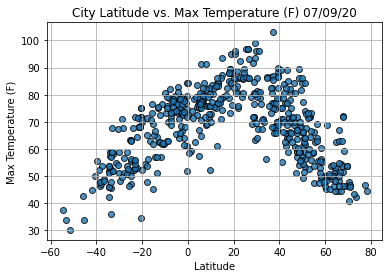

In [17]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps, 
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (F) " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

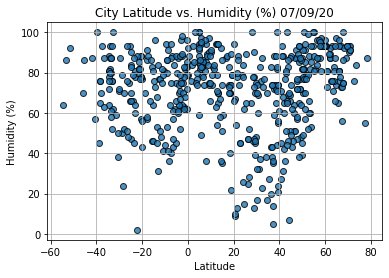

In [18]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity, 
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

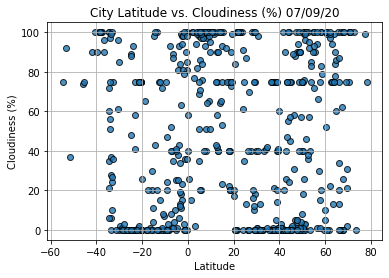

In [19]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness, 
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

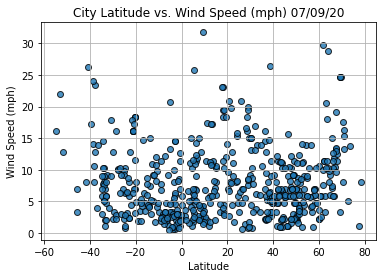

In [20]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed, 
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [21]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot of the x and y values
    plt.scatter(x_values,y_values)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show()

In [22]:
# Create the Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ayorou,NE,2020-07-09 23:03:39,14.73,0.92,93.63,35,93,7.09
1,Dikson,RU,2020-07-09 22:59:48,73.51,80.55,42.46,84,0,13.71
3,Vardo,NO,2020-07-09 23:02:27,70.37,31.11,47.97,90,100,17.60
7,Mugur-Aksy,RU,2020-07-09 23:03:40,50.35,90.50,49.39,70,18,2.93
11,San Andres,CO,2020-07-09 23:03:41,12.58,-81.70,84.20,79,75,4.70


In [23]:
# Create the Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Punta Arenas,CL,2020-07-09 23:03:39,-53.15,-70.92,33.80,86,92,21.92
4,Grand Gaube,MU,2020-07-09 23:03:40,-20.01,57.66,70.00,77,26,8.01
5,Port Alfred,ZA,2020-07-09 23:03:40,-33.59,26.89,59.00,87,28,1.99
6,East London,ZA,2020-07-09 23:01:19,-33.02,27.91,67.55,52,10,2.04
8,Clarence Town,AU,2020-07-09 23:03:40,-32.58,151.78,57.99,100,75,9.17


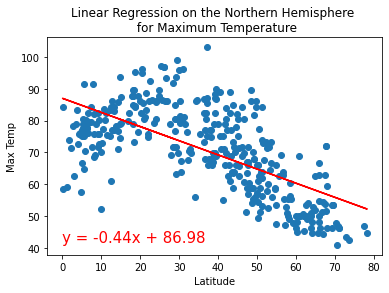

In [24]:
# Latitude vs. Max Temperature: Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',
                       (0,42))

In [25]:
# Check the r-value to determine if relationship btw the 2 variables is strong
# r-value is about -0.7
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(-0.4437447405897332,
 86.98249719584243,
 -0.6582236559837795,
 4.487625993762321e-45,
 0.027128030387056138)

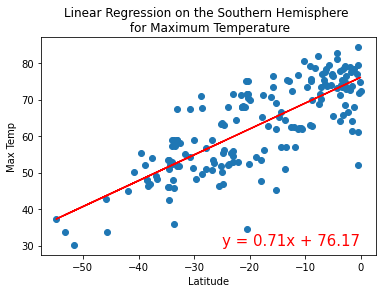

In [26]:
# Latitude vs. Max Temperature Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',
                       (-25,30))

In [27]:
# Check the r-value to determine if relationship btw the 2 variables is strong
# r-value is greater than 0.7
# both r-values indicate, as we approach the equator (0 deg. lat.), the temp becomes warmer
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(0.7093827081823569,
 76.16955733982519,
 0.7778199437407837,
 1.5253089150491536e-37,
 0.0430835333617079)

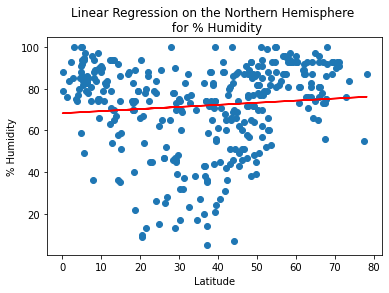

In [28]:
# Latitude vs. Humidity: Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (45,0))

In [29]:
# Check the r-value to determine if relationship btw the 2 variables is strong
# low r-value
# indicates low correlation btw. lat. & % humidity
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(0.10075118758086621,
 68.29948199383686,
 0.0965093015521325,
 0.07053524388490166,
 0.05554116463394762)

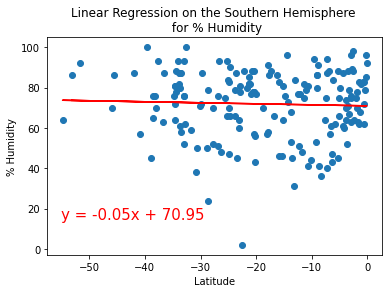

In [30]:
# Latitude vs. Humidity: Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (-55,15))

In [31]:
# Check the r-value to determine if relationship btw the 2 variables is strong
# low r-value
# confirms % humidity is unpredictable due to changing weather patterns 
# that can increase or decrease % humidity
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(-0.05066950371628089,
 70.94772207138939,
 -0.03972694964808985,
 0.5975026508919996,
 0.09579256853331983)

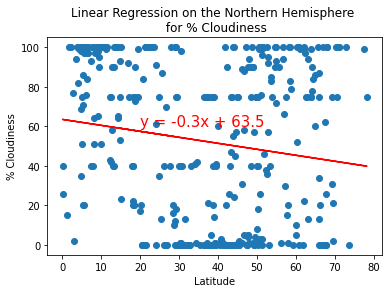

In [32]:
# Latitude vs. Cloudiness: Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (20,60))

In [33]:
# Check the r-value to determine if relationship btw the 2 variables is strong
# low r-value
# indicates low correlation btw. lat. & % cloudiness
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(-0.30257901789621877,
 63.502721472507254,
 -0.15287641108254002,
 0.00404115502762635,
 0.10455121213729335)

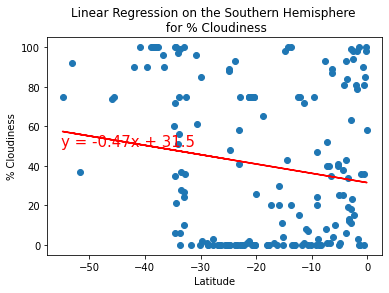

In [34]:
# Latitude vs. Cloudiness: Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (-55,50))

In [35]:
# Check the r-value to determine if relationship btw the 2 variables is strong
# low r-value
# confirms cloudiness is unpredictable due to changing weather patterns 
# that can increase or decrease % cloudiness
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(-0.4724851281606483,
 31.501484400200276,
 -0.16010370628879486,
 0.0322849501961624,
 0.21895827553661565)

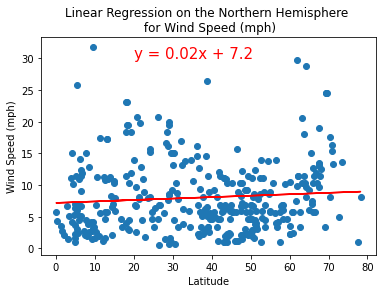

In [36]:
# Latitude vs. Wind Speed: Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)',
                       'Wind Speed (mph)',
                       (20,30))

In [37]:
# Check the r-value to determine if relationship btw the 2 variables is strong
# low r-value
# indicates low correlation btw. lat. & wind speed
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(0.02269928749066145,
 7.195944084928133,
 0.08144649215972158,
 0.12721640358722866,
 0.014847747282230537)

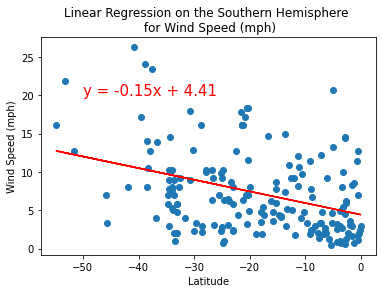

In [38]:
# Latitude vs. Wind Speed: Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)',
                       'Wind Speed (mph)',
                       (-50,20))

In [39]:
# Check the r-value to determine if relationship btw the 2 variables is strong
# low r-value
# confirms wind speed is unpredictable due to changing weather patterns 
# that can increase or decrease wind speed
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(-0.1519726653161609,
 4.411209851660692,
 -0.3701474569311104,
 3.399189109951655e-07,
 0.028668645550868756)